<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/BASE%20BIEN%20TESIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.1 MB/s eta 0:00:00


In [ ]:
!pip install pandas openpyxl linearmodels


In [ ]:
import pandas as pd

# Cargar el archivo Excel
df = pd.read_excel("PANEL BIEN 1.xlsx", sheet_name="Hoja1")

# Renombrar columnas
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'CCV', 'ROA', 'ROE']

# Eliminar filas con encabezados repetidos
df = df[df['PERIODO'] != 'PERIODO']

# Convertir columnas a valores numéricos
df['PERIODO'] = pd.to_numeric(df['PERIODO'])
df[['RATIO_LIQUIDEZ', 'IMOR', 'CCV', 'ROA', 'ROE']] = df[['RATIO_LIQUIDEZ', 'IMOR', 'CCV', 'ROA', 'ROE']].apply(pd.to_numeric)


In [ ]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

# Establecer índice de panel con 'UNIONES' y 'PERIODO'
df_panel = df.set_index(['UNIONES', 'PERIODO'])

# Definir la variable dependiente y las independientes
Y = df_panel['RATIO_LIQUIDEZ']
X = df_panel[['IMOR', 'CCV', 'ROE', 'ROA']]
X = sm.add_constant(X)

# Crear y ajustar el modelo de efectos fijos
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit()


# Mostrar resumen de la regresión
results.summary


Dep. Variable:,RATIO_LIQUIDEZ,R-squared:,0.0756
Estimator:,PanelOLS,R-squared (Between):,0.1350
No. Observations:,1148,R-squared (Within):,0.0756
Date:,"Wed, May 21 2025",R-squared (Overall):,0.1086
Time:,04:39:28,Log-likelihood,-118.13
Cov. Estimator:,Unadjusted,,
,,F-statistic:,23.110
Entities:,14,P-value,0.0000
Avg Obs:,82.000,Distribution:,"F(4,1130)"
Min Obs:,82.000,,
Max Obs:,82.000,F-statistic (robust):,23.110


In [ ]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import numpy as np

# Establecer índice de panel con 'UNIONES' y 'PERIODO'
df_panel = df.set_index(['UNIONES', 'PERIODO'])

# Definir la variable dependiente y las independientes
Y = df_panel['RATIO_LIQUIDEZ']
X = df_panel[['IMOR', 'CCV', 'ROE', 'ROA']]
X = sm.add_constant(X)

# Crear y ajustar el modelo de efectos fijos
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit()

# Calcular el error estándar de la regresión (RMSE)
residuals = results.resids
n = residuals.shape[0]  # número total de observaciones
k = X.shape[1]  # número de variables (incluyendo constante)
rmse = np.sqrt((residuals ** 2).sum() / (n - k))

# Mostrar el resumen y el RMSE
print(results.summary)
print(f"\nError estándar de la regresión (RMSE): {rmse:.4f}")

                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Wed, May 21 2025   R-squared (Overall):              0.1086
Time:                        04:39:42   Log-likelihood                   -118.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:                       82.000                                           
Max Obs:                       82.000   F-statistic (robust):             23.110
                            

In [ ]:
# Cargar el archivo Excel
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")

# Renombrar columnas
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'CCV', 'ROA', 'ROE']

# Eliminar filas con encabezados repetidos
df = df[df['PERIODO'] != 'PERIODO']

# Convertir columnas a valores numéricos
df['PERIODO'] = pd.to_numeric(df['PERIODO'])
df[['RATIO_LIQUIDEZ', 'IMOR', 'CCV', 'ROA', 'ROE']] = df[['RATIO_LIQUIDEZ', 'IMOR', 'CCV', 'ROA', 'ROE']].apply(pd.to_numeric)

from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import numpy as np

# Establecer índice de panel con 'UNIONES' y 'PERIODO'
df_panel = df.set_index(['UNIONES', 'PERIODO'])

# Definir la variable dependiente y las independientes
Y = df_panel['RATIO_LIQUIDEZ']
X = df_panel[['IMOR', 'CCV', 'ROE', 'ROA']]
X = sm.add_constant(X)

# Crear y ajustar el modelo de efectos fijos
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit(cov_type='clustered', cluster_entity=True)

# Calcular el error estándar de la regresión (RMSE)
residuals = results.resids
n = residuals.shape[0]  # número total de observaciones
k = X.shape[1]  # número de variables (incluyendo constante)
rmse = np.sqrt((residuals ** 2).sum() / (n - k))

# Mostrar el resumen y el RMSE
print(results.summary)
print(f"\nError estándar de la regresión (RMSE): {rmse:.4f}")


                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Wed, May 21 2025   R-squared (Overall):              0.1086
Time:                        04:39:50   Log-likelihood                   -118.13
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:                       82.000                                           
Max Obs:                       82.000   F-statistic (robust):             10.528
                            

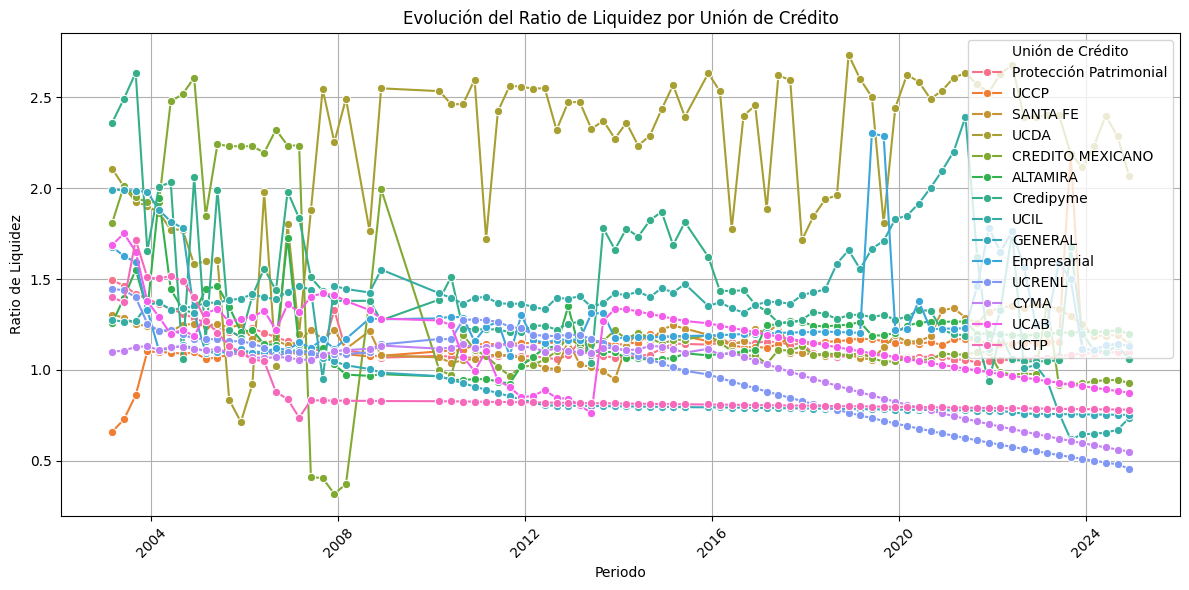

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'CCV', 'ROA', 'ROE']
df = df[df['PERIODO'] != 'PERIODO']

# Convertir tipos de datos
df['PERIODO'] = pd.to_datetime(df['PERIODO'].astype(str), format='%Y%m')
df[['RATIO_LIQUIDEZ']] = df[['RATIO_LIQUIDEZ']].apply(pd.to_numeric)

# Crear gráfica
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='PERIODO', y='RATIO_LIQUIDEZ', hue='UNIONES', marker='o')

plt.title('Evolución del Ratio de Liquidez por Unión de Crédito')
plt.xlabel('Periodo')
plt.ylabel('Ratio de Liquidez')
plt.xticks(rotation=45)
plt.legend(title='Unión de Crédito')
plt.grid(True)
plt.tight_layout()
plt.show()


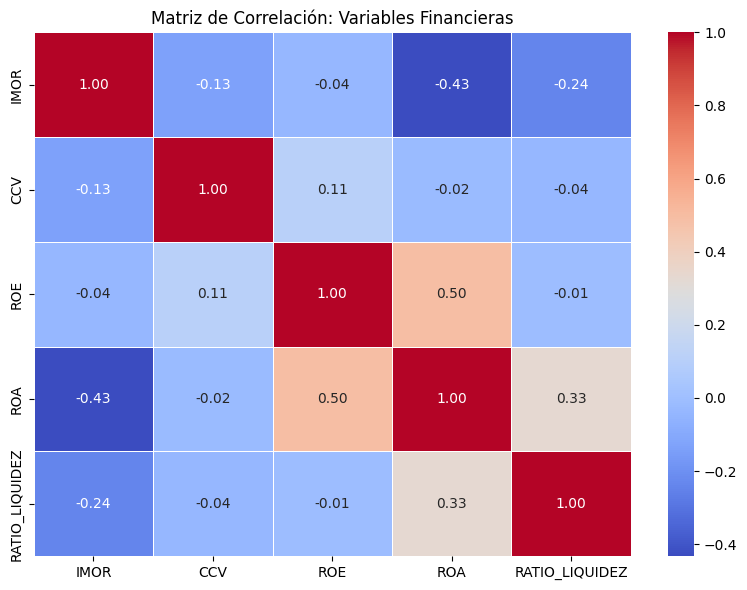

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'CCV', 'ROA', 'ROE']
df = df[df['PERIODO'] != 'PERIODO']

# Convertir columnas relevantes a numéricas
variables = ['IMOR', 'CCV', 'ROE', 'ROA', 'RATIO_LIQUIDEZ']
df[variables] = df[variables].apply(pd.to_numeric)

# Calcular matriz de correlación
correlation_matrix = df[variables].corr()

# Crear matriz de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title('Matriz de Correlación: Variables Financieras')
plt.tight_layout()
plt.show()


In [ ]:
from linearmodels.panel import compare

# Modelo con errores estándar clásicos
results_ols = model.fit(cov_type='unadjusted')

# Modelo con errores robustos agrupados
results_robust = model.fit(cov_type='clustered', cluster_entity=True)

# Comparación de ambos
print(compare({'Unadjusted': results_ols, 'Clustered': results_robust}))


                       Model Comparison                      
                                Unadjusted          Clustered
-------------------------------------------------------------
Dep. Variable               RATIO_LIQUIDEZ     RATIO_LIQUIDEZ
Estimator                         PanelOLS           PanelOLS
No. Observations                      1148               1148
Cov. Est.                       Unadjusted          Clustered
R-squared                           0.0756             0.0756
R-Squared (Within)                  0.0756             0.0756
R-Squared (Between)                 0.1350             0.1350
R-Squared (Overall)                 0.1086             0.1086
F-statistic                         23.110             23.110
P-value (F-stat)                    0.0000             0.0000
=====================     ================   ================
const                               1.3854             1.3854
                                  (58.648)           (26.510)
IMOR    

In [ ]:
# Obtener residuos del modelo
df_panel['residuals'] = results_robust.resids

# Correlación de errores entre periodos para cada entidad
for entidad in df_panel.index.levels[0]:
    residuos = df_panel.loc[entidad]['residuals']
    autocor = residuos.autocorr()
    print(f"Autocorrelación en {entidad}: {autocor:.3f}")


Autocorrelación en ALTAMIRA: 0.717
Autocorrelación en CREDITO MEXICANO: 0.826
Autocorrelación en CYMA: 0.980
Autocorrelación en Credipyme: 0.474
Autocorrelación en Empresarial: 0.606
Autocorrelación en GENERAL: 0.973
Autocorrelación en Protección Patrimonial: 0.722
Autocorrelación en SANTA FE: 0.843
Autocorrelación en UCAB: 0.824
Autocorrelación en UCCP: 0.265
Autocorrelación en UCDA: 0.637
Autocorrelación en UCIL: 0.836
Autocorrelación en UCRENL: 0.960
Autocorrelación en UCTP: 0.890


In [ ]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import numpy as np

# Establecer índice de panel con 'UNIONES' y 'PERIODO'
df_panel = df.set_index(['UNIONES', 'PERIODO'])

# Definir la variable dependiente y las independientes
Y = df_panel['RATIO_LIQUIDEZ']
X = df_panel[['IMOR', 'CCV', 'ROE', 'ROA']]
X = sm.add_constant(X)

# Crear y ajustar el modelo de efectos fijos
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit()

# Calcular el error estándar de la regresión (RMSE)
residuals = results.resids
n = residuals.shape[0]  # número total de observaciones
k = X.shape[1]  # número de variables (incluyendo constante)
rmse = np.sqrt((residuals ** 2).sum() / (n - k))

# Mostrar el resumen del modelo
print(results.summary)

# Mostrar el RMSE
print(f"\nError estándar de la regresión (RMSE): {rmse:.4f}")

# Mostrar los intervalos de confianza del 95%
conf_int = results.conf_int(level=0.95)
print("\nIntervalos de confianza del 95 % para los coeficientes:")
print(conf_int)


                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Wed, May 21 2025   R-squared (Overall):              0.1086
Time:                        04:40:53   Log-likelihood                   -118.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:                       82.000                                           
Max Obs:                       82.000   F-statistic (robust):             23.110
                            

In [ ]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import numpy as np

# Establecer índice de panel con 'UNIONES' y 'PERIODO'
df_panel = df.set_index(['UNIONES', 'PERIODO'])

# Definir la variable dependiente y las independientes
Y = df_panel['RATIO_LIQUIDEZ']
X = df_panel[['IMOR', 'CCV', 'ROE', 'ROA']]
X = sm.add_constant(X)

# Crear y ajustar el modelo de efectos fijos
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit()

# Calcular el error estándar de la regresión (RMSE)
residuals = results.resids
n = residuals.shape[0]
k = X.shape[1]
rmse = np.sqrt((residuals ** 2).sum() / (n - k))

# Calcular la media del ratio de liquidez
media_ratio = Y.mean()

# Calcular el coeficiente de variación
coef_variacion = rmse / media_ratio

# Mostrar el resumen del modelo con coeficientes en %
print("\nResumen del modelo con coeficientes en puntos base (multiplicados por 100):\n")
params_percent = results.params * 100
print(params_percent)

# Mostrar RMSE y media del ratio
print(f"\nError estándar de la regresión (RMSE): {rmse:.4f}")
print(f"Media del ratio de liquidez: {media_ratio:.4f}")

# Mostrar coeficiente de variación
print(f"Coeficiente de variación (CV): {coef_variacion:.6f}")

# Evaluación cualitativa
if coef_variacion < 0.10:
    print("👉 El error es muy bajo respecto a la media: el modelo es bastante preciso.")
elif coef_variacion < 0.25:
    print("👉 El error es razonable respecto a la media: el modelo tiene buen ajuste.")
else:
    print("👉 El error es relativamente alto respecto a la media: el modelo podría mejorar.")

# Intervalos de confianza
conf_int = results.conf_int(level=0.95)
print("\nIntervalos de confianza del 95 % para los coeficientes:")
print(conf_int)



Resumen del modelo con coeficientes en puntos base (multiplicados por 100):

const    138.540285
IMOR      -0.282102
CCV       -0.199355
ROE       -0.266032
ROA        1.768922
Name: parameter, dtype: float64

Error estándar de la regresión (RMSE): 0.2688
Media del ratio de liquidez: 1.2216
Coeficiente de variación (CV): 0.220025
👉 El error es razonable respecto a la media: el modelo tiene buen ajuste.

Intervalos de confianza del 95 % para los coeficientes:
          lower     upper
const  1.339055  1.431751
IMOR  -0.003913 -0.001729
CCV   -0.002725 -0.001262
ROE   -0.004268 -0.001052
ROA    0.010273  0.025106


In [ ]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import numpy as np

# Establecer índice de panel con 'UNIONES' y 'PERIODO'
df_panel = df.set_index(['UNIONES', 'PERIODO'])

# Definir la variable dependiente y las independientes
Y = df_panel['RATIO_LIQUIDEZ']
X = df_panel[['IMOR', 'CCV', 'ROE', 'ROA']]
X = sm.add_constant(X)

# Crear y ajustar el modelo de efectos fijos
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit()

# Calcular el error estándar de la regresión (RMSE)
residuals = results.resids
n = residuals.shape[0]
k = X.shape[1]
rmse = np.sqrt((residuals ** 2).sum() / (n - k))

# Calcular la media del ratio de liquidez y coeficiente de variación
media_ratio = Y.mean()
coef_variacion = rmse / media_ratio

# Mostrar el resumen original del modelo
print(results.summary)

# Mostrar RMSE y coeficiente de variación
print(f"\nError estándar de la regresión (RMSE): {rmse:.4f}")
print(f"Media del ratio de liquidez: {media_ratio:.4f}")
print(f"Coeficiente de variación (CV): {coef_variacion:.6f}")

# Evaluación cualitativa
if coef_variacion < 0.10:
    print("👉 El error es muy bajo respecto a la media: el modelo es bastante preciso.")
elif coef_variacion < 0.25:
    print("👉 El error es razonable respecto a la media: el modelo tiene buen ajuste.")
else:
    print("👉 El error es relativamente alto respecto a la media: el modelo podría mejorar.")

# Mostrar los coeficientes multiplicando IMOR, CCV, ROE, ROA por 100 (en puntos base)
print("\nCoeficientes del modelo (IMOR, CCV, ROE, ROA en puntos base):")
coef = results.params.copy()
coef['IMOR'] *= 100
coef['CCV'] *= 100
coef['ROE'] *= 100
coef['ROA'] *= 100
print(coef)

# Mostrar intervalos de confianza
conf_int = results.conf_int(level=0.95)
print("\nIntervalos de confianza del 95 % para los coeficientes:")
print(conf_int)



                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Wed, May 21 2025   R-squared (Overall):              0.1086
Time:                        05:22:55   Log-likelihood                   -118.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:                       82.000                                           
Max Obs:                       82.000   F-statistic (robust):             23.110
                            

In [ ]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Establecer índice de panel
df_panel = df.set_index(['UNIONES', 'PERIODO'])

# Definir variables
Y = df_panel['RATIO_LIQUIDEZ']
X = df_panel[['IMOR', 'CCV', 'ROE', 'ROA']]
X = sm.add_constant(X)

# Ajustar modelo de efectos fijos
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit()

# Copiar resultados para modificar coeficientes
mod_results = results

# Variables a escalar por 100 (menos la constante)
scale_vars = ['IMOR', 'CCV', 'ROE', 'ROA']

# Escalar coeficientes, errores estándar, y límites de intervalo de confianza
mod_results.params[scale_vars] *= 100
mod_results.std_errors[scale_vars] *= 100
mod_results.tstats[scale_vars] = mod_results.params[scale_vars] / mod_results.std_errors[scale_vars]

# No se escala el p-value porque no cambia
# Escalar también los intervalos de confianza
conf_int_scaled = results.conf_int(level=0.95)
conf_int_scaled.loc[scale_vars] *= 100

# Calcular RMSE
residuals = results.resids
n = residuals.shape[0]
k = X.shape[1]
rmse = np.sqrt((residuals ** 2).sum() / (n - k))

# Calcular media y coeficiente de variación
media_ratio = Y.mean()
coef_variacion = rmse / media_ratio

# Mostrar el resumen del modelo con coeficientes escalados
print(mod_results.summary)

# Mostrar métricas adicionales
print(f"\nError estándar de la regresión (RMSE): {rmse:.4f}")
print(f"Media del ratio de liquidez: {media_ratio:.4f}")
print(f"Coeficiente de variación (CV): {coef_variacion:.6f}")

# Interpretación
if coef_variacion < 0.10:
    print("👉 El error es muy bajo respecto a la media: el modelo es bastante preciso.")
elif coef_variacion < 0.25:
    print("👉 El error es razonable respecto a la media: el modelo tiene buen ajuste.")
else:
    print("👉 El error es relativamente alto respecto a la media: el modelo podría mejorar.")

# Mostrar intervalos de confianza con escalamiento reflejado
print("\nIntervalos de confianza del 95 % para los coeficientes (IMOR, CCV, ROE, ROA escalados):")
print(conf_int_scaled)


                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Wed, May 21 2025   R-squared (Overall):              0.1086
Time:                        06:06:50   Log-likelihood                   -118.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:                       82.000                                           
Max Obs:                       82.000   F-statistic (robust):             51.828
                            

In [ ]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Establecer índice de panel
df_panel = df.set_index(['UNIONES', 'PERIODO'])

# Definir variables
Y = df_panel['RATIO_LIQUIDEZ']
X = df_panel[['IMOR', 'CCV', 'ROE', 'ROA']]
X = sm.add_constant(X)

# Ajustar modelo de efectos fijos
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit()

# Crear copia de resultados para modificar solo los coeficientes
scaled_params = results.params.copy()
scaled_params[['IMOR', 'CCV', 'ROE', 'ROA']] *= 100

# Reemplazar los coeficientes escalados temporalmente en el objeto original solo para impresión
results._params = scaled_params  # sobreescribimos SOLO los coeficientes

# Calcular RMSE
residuals = results.resids
n = residuals.shape[0]
k = X.shape[1]
rmse = np.sqrt((residuals ** 2).sum() / (n - k))

# Calcular media y coeficiente de variación
media_ratio = Y.mean()
coef_variacion = rmse / media_ratio

# Imprimir el summary del modelo con coeficientes escalados
print(results.summary)

# Imprimir métricas adicionales
print(f"\nError estándar de la regresión (RMSE): {rmse:.4f}")
print(f"Media del ratio de liquidez: {media_ratio:.4f}")
print(f"Coeficiente de variación (CV): {coef_variacion:.6f}")

# Interpretación del error
if coef_variacion < 0.10:
    print("👉 El error es muy bajo respecto a la media: el modelo es bastante preciso.")
elif coef_variacion < 0.25:
    print("👉 El error es razonable respecto a la media: el modelo tiene buen ajuste.")
else:
    print("👉 El error es relativamente alto respecto a la media: el modelo podría mejorar.")


                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Wed, May 21 2025   R-squared (Overall):              0.1086
Time:                        06:12:50   Log-likelihood                   -118.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:                       82.000                                           
Max Obs:                       82.000   F-statistic (robust):          2.311e+05
                            

In [ ]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Establecer índice de panel
df_panel = df.set_index(['UNIONES', 'PERIODO'])

# Definir variables
Y = df_panel['RATIO_LIQUIDEZ']
X = df_panel[['IMOR', 'CCV', 'ROE', 'ROA']]
X = sm.add_constant(X)

# Ajustar modelo de efectos fijos
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit()

# Calcular RMSE
residuals = results.resids
n = residuals.shape[0]
k = X.shape[1]
rmse = np.sqrt((residuals ** 2).sum() / (n - k))

# Calcular media y coeficiente de variación
media_ratio = Y.mean()
coef_variacion = rmse / media_ratio

# ====== MODIFICAR SÓLO LOS COEFICIENTES PARA MOSTRARLOS EN EL SUMMARY ======
# Copiar resultados originales
params_scaled = results.params.copy()

# Multiplicar solo los coeficientes deseados
for var in ['IMOR', 'CCV', 'ROE', 'ROA']:
    params_scaled[var] *= 100

# Crear una tabla nueva con los valores originales, excepto los coeficientes escalados
summary_df = pd.DataFrame({
    'Parameter': params_scaled,
    'Std. Err.': results.std_errors,
    'T-stat': results.tstats,
    'P-value': results.pvalues,
    'Lower CI': results.conf_int().iloc[:, 0],
    'Upper CI': results.conf_int().iloc[:, 1]
})

# Imprimir el resumen como en el formato original
print("\n=====================  Parameter Estimates  =====================")
print(summary_df.to_string(float_format="{:.4f}".format))
print("=================================================================")

# Imprimir estadísticos adicionales
print(f"\nF-test for Poolability: {results.f_statistic.stat:.3f}")
print(f"P-value: {results.f_statistic.pval:.4f}")
print(f"Distribution: {results.f_statistic.dist_name}({int(results.f_statistic.df_denom)}, {int(results.f_statistic.df_num)})")

print("\nIncluded effects: Entity")
print(f"\nError estándar de la regresión (RMSE): {rmse:.4f}")
print(f"Media del ratio de liquidez: {media_ratio:.4f}")
print(f"Coeficiente de variación (CV): {coef_variacion:.6f}")

# Interpretación
if coef_variacion < 0.10:
    print("👉 El error es muy bajo respecto a la media: el modelo es bastante preciso.")
elif coef_variacion < 0.25:
    print("👉 El error es razonable respecto a la media: el modelo tiene buen ajuste.")
else:
    print("👉 El error es relativamente alto respecto a la media: el modelo podría mejorar.")

# Mostrar intervalos de confianza del 95 % por separado como en tu código original
print("\nIntervalos de confianza del 95 % para los coeficientes:")
print(results.conf_int(level=0.95))



=====================  Parameter Estimates  =====================
       Parameter  Std. Err.  T-stat  P-value  Lower CI  Upper CI
const     1.3854     0.0236 58.6485   0.0000    1.3391    1.4318
IMOR     -0.2821     0.0006 -5.0668   0.0000   -0.0039   -0.0017
CCV      -0.1994     0.0004 -5.3483   0.0000   -0.0027   -0.0013
ROE      -0.2660     0.0008 -3.2459   0.0012   -0.0043   -0.0011
ROA       1.7689     0.0038  4.6797   0.0000    0.0103    0.0251

F-test for Poolability: 23.110
P-value: 0.0000


AttributeError: 'WaldTestStatistic' object has no attribute 'df_num'

In [ ]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Establecer índice de panel
df_panel = df.set_index(['UNIONES', 'PERIODO'])

# Definir variables
Y = df_panel['RATIO_LIQUIDEZ']
X = df_panel[['IMOR', 'CCV', 'ROE', 'ROA']]
X = sm.add_constant(X)

# Ajustar modelo de efectos fijos
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit()

# Calcular RMSE
residuals = results.resids
n = residuals.shape[0]
k = X.shape[1]
rmse = np.sqrt((residuals ** 2).sum() / (n - k))

# Calcular media y coeficiente de variación
media_ratio = Y.mean()
coef_variacion = rmse / media_ratio

# ====== MODIFICAR SÓLO LOS COEFICIENTES PARA MOSTRARLOS EN EL SUMMARY ======
# Copiar resultados originales
params_scaled = results.params.copy()

# Multiplicar solo los coeficientes deseados
for var in ['IMOR', 'CCV', 'ROE', 'ROA']:
    params_scaled[var] *= 100

# Crear una tabla nueva con los valores originales, excepto los coeficientes escalados
summary_df = pd.DataFrame({
    'Parameter': params_scaled,
    'Std. Err.': results.std_errors,
    'T-stat': results.tstats,
    'P-value': results.pvalues,
    'Lower CI': results.conf_int().iloc[:, 0],
    'Upper CI': results.conf_int().iloc[:, 1]
})

# Imprimir el resumen como en el formato original
print("\n=====================  Parameter Estimates  =====================")
print(summary_df.to_string(float_format="{:.4f}".format))
print("=================================================================")

# Imprimir estadísticos adicionales
print(f"\nF-test for Poolability: {results.f_statistic.stat:.3f}")
print(f"P-value: {results.f_statistic.pval:.4f}")

# Calculate numerator degrees of freedom manually
num_entities = df_panel.index.get_level_values('UNIONES').nunique()
f_df_num = num_entities - 1

# Use the calculated numerator degrees of freedom
print(f"Distribution: {results.f_statistic.dist_name}({int(results.f_statistic.df_denom)}, {int(f_df_num)})")


print("\nIncluded effects: Entity")
print(f"\nError estándar de la regresión (RMSE): {rmse:.4f}")
print(f"Media del ratio de liquidez: {media_ratio:.4f}")
print(f"Coeficiente de variación (CV): {coef_variacion:.6f}")

# Interpretación
if coef_variacion < 0.10:
    print("👉 El error es muy bajo respecto a la media: el modelo es bastante preciso.")
elif coef_variacion < 0.25:
    print("👉 El error es razonable respecto a la media: el modelo tiene buen ajuste.")
else:
    print("👉 El error es relativamente alto respecto a la media: el modelo podría mejorar.")

# Mostrar intervalos de confianza del 95 % por separado como en tu código original
print("\nIntervalos de confianza del 95 % para los coeficientes:")
print(results.conf_int(level=0.95))


=====================  Parameter Estimates  =====================
       Parameter  Std. Err.  T-stat  P-value  Lower CI  Upper CI
const     1.3854     0.0236 58.6485   0.0000    1.3391    1.4318
IMOR     -0.2821     0.0006 -5.0668   0.0000   -0.0039   -0.0017
CCV      -0.1994     0.0004 -5.3483   0.0000   -0.0027   -0.0013
ROE      -0.2660     0.0008 -3.2459   0.0012   -0.0043   -0.0011
ROA       1.7689     0.0038  4.6797   0.0000    0.0103    0.0251

F-test for Poolability: 23.110
P-value: 0.0000
Distribution: F(4,1130)(1130, 13)

Included effects: Entity

Error estándar de la regresión (RMSE): 0.2688
Media del ratio de liquidez: 1.2216
Coeficiente de variación (CV): 0.220025
👉 El error es razonable respecto a la media: el modelo tiene buen ajuste.

Intervalos de confianza del 95 % para los coeficientes:
          lower     upper
const  1.339055  1.431751
IMOR  -0.003913 -0.001729
CCV   -0.002725 -0.001262
ROE   -0.004268 -0.001052
ROA    0.010273  0.025106


In [ ]:
# Calcular intervalo de confianza de la media del ratio de liquidez
ic_inferior = media_ratio - 2 * rmse
ic_superior = media_ratio + 2 * rmse

print(f"\nIntervalo de confianza aproximado del 95 % para la media del ratio de liquidez:")
print(f"[{ic_inferior:.4f}, {ic_superior:.4f}]")



Intervalo de confianza aproximado del 95 % para la media del ratio de liquidez:
[0.6840, 1.7592]


<ipython-input-3-94426b72496c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PERIODO'] = pd.to_numeric(df['PERIODO'])
<ipython-input-3-94426b72496c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)


Coeficientes del modelo:
const    1.385403
IMOR    -0.002821
ICOR    -0.001994
ROE     -0.002660
ROA      0.017689
Name: parameter, dtype: float64
Resultados del summary: 
                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Thu, May 29 2025   R-squared (Overall):              0.1086
Time:                        06:44:04   Log-likelihood                   -118.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:          

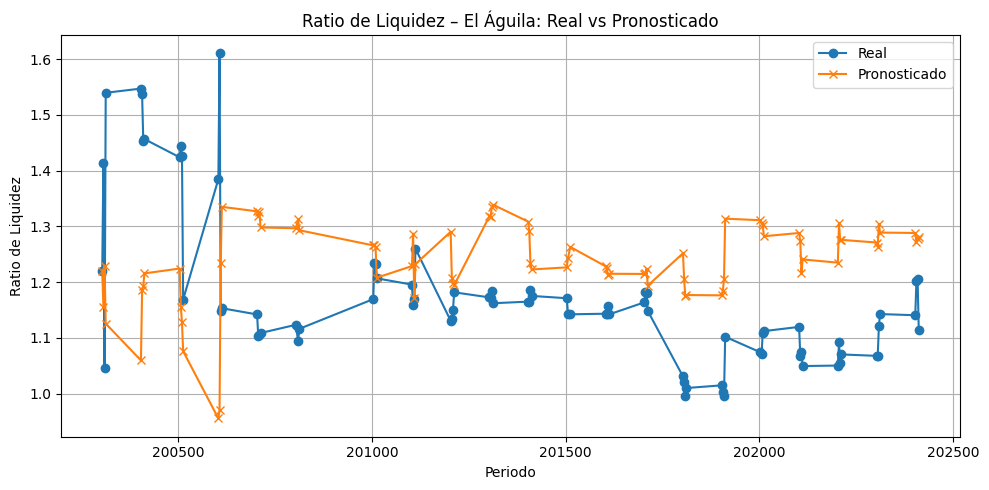


Archivo exportado como 'Pronostico_El_Aguila.xlsx'


In [ ]:
# Instalación de librerías necesarias
!pip install linearmodels
!pip install pandas openpyxl

import pandas as pd
import numpy as np
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ----------------------------
# 1. Ajustar modelo con PANEL BIEN
# ----------------------------

# Cargar y limpiar la base PANEL BIEN
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df = df[df['PERIODO'] != 'PERIODO']
df['PERIODO'] = pd.to_numeric(df['PERIODO'])
df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

# Preparar datos de panel
df_panel = df.set_index(['UNIONES', 'PERIODO'])
Y = df_panel['RATIO_LIQUIDEZ']
X = sm.add_constant(df_panel[['IMOR', 'ICOR', 'ROE', 'ROA']])
modelo = PanelOLS(Y, X, entity_effects=True)
resultados = modelo.fit()

# Obtener coeficientes
coeficientes = resultados.params
print("Coeficientes del modelo:")
print(coeficientes)

print("Resultados del summary: ")
print(resultados.summary)

# ----------------------------
# 2. Función forecast
# ----------------------------

def forecast_panel(X_nuevo, coeficientes):
    """
    Realiza el pronóstico de RATIO_LIQUIDEZ utilizando los coeficientes del modelo.
    """
    return X_nuevo.dot(coeficientes)

# ----------------------------
# 3. Pronóstico de El Águila
# ----------------------------

# Leer archivo de El Águila
df_aguila = pd.read_excel("El Águila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

# Preparar X con constante
X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])

# Usar la función forecast
df_aguila['PRONOSTICO'] = forecast_panel(X_aguila, coeficientes)

# Calcular error
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

# Calcular métricas de error
rmse_aguila = np.sqrt((df_aguila['ERROR'] ** 2).mean())
mae_aguila = np.mean(np.abs(df_aguila['ERROR']))

print(f"\nRMSE del pronóstico de El Águila (sin efecto fijo): {rmse_aguila:.4f}")
print(f"MAE (Error Promedio Absoluto): {mae_aguila:.4f}")

# Mostrar tabla de comparación
print("\nComparación real vs. pronóstico:")
print(df_aguila[['PERIODO', 'RATIO_LIQUIDEZ', 'PRONOSTICO', 'ERROR']])

# ----------------------------
# 4. Graficar resultado
# ----------------------------

plt.figure(figsize=(10, 5))
plt.plot(df_aguila['PERIODO'], df_aguila['RATIO_LIQUIDEZ'], marker='o', label='Real')
plt.plot(df_aguila['PERIODO'], df_aguila['PRONOSTICO'], marker='x', label='Pronosticado')
plt.title('Ratio de Liquidez – El Águila: Real vs Pronosticado')
plt.xlabel('Periodo')
plt.ylabel('Ratio de Liquidez')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 5. Exportar a Excel
# ----------------------------

df_aguila.to_excel("Pronostico_El_Aguila.xlsx", index=False)
print("\nArchivo exportado como 'Pronostico_El_Aguila.xlsx'")

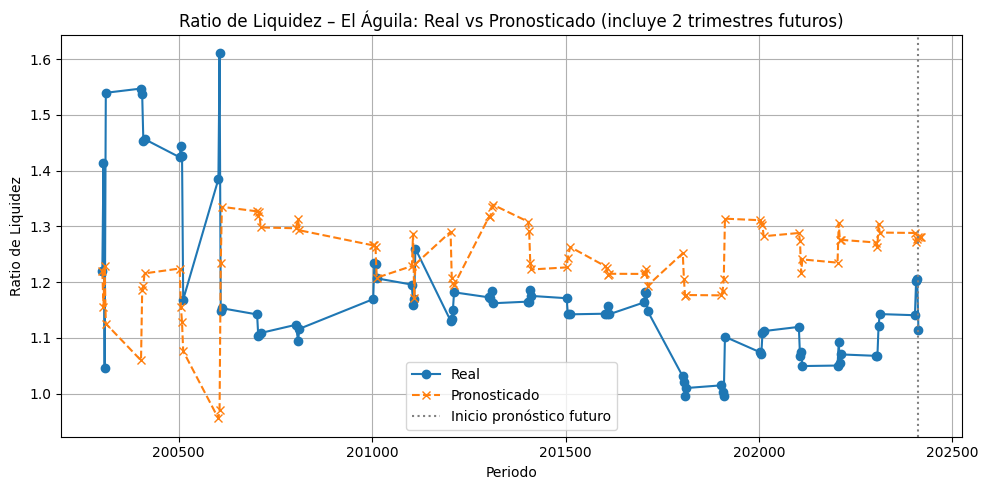


Archivo exportado con los 2 trimestres futuros como 'Pronostico_El_Aguila_2Futuros.xlsx'


In [ ]:
# ----------------------------
# 6. Pronóstico para 2 periodos futuros (202503 y 202506)
# ----------------------------

# Obtener los últimos valores disponibles de las variables independientes
ultimo_periodo = df_aguila['PERIODO'].max()
valores_ultimos = df_aguila[df_aguila['PERIODO'] == ultimo_periodo][['IMOR', 'ICOR', 'ROE', 'ROA']].iloc[0]

# Crear DataFrame para los nuevos periodos
futuros_periodos = [ultimo_periodo + 3, ultimo_periodo + 6]  # Trimestres siguientes
df_futuro = pd.DataFrame({
    'UNIONES': ['EL AGUILA'] * 2,
    'PERIODO': futuros_periodos,
    'IMOR': [valores_ultimos['IMOR']] * 2,
    'ICOR': [valores_ultimos['ICOR']] * 2,
    'ROE': [valores_ultimos['ROE']] * 2,
    'ROA': [valores_ultimos['ROA']] * 2,
})

# Crear X_futuro y asegurarse de que tenga todas las columnas necesarias
X_futuro_raw = df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA']]
X_futuro = sm.add_constant(X_futuro_raw, has_constant='add')

# Alinear columnas exactamente con las del modelo (coeficientes)
for col in coeficientes.index:
    if col not in X_futuro.columns:
        X_futuro[col] = 0  # Si faltara alguna columna, agregamos con ceros

# Reordenar columnas
X_futuro = X_futuro[coeficientes.index]

# Pronóstico
df_futuro['PRONOSTICO'] = forecast_panel(X_futuro, coeficientes)

# Agregar columnas vacías para mantener estructura y unir con df_aguila
df_futuro['RATIO_LIQUIDEZ'] = np.nan
df_futuro['ERROR'] = np.nan

# Reordenar columnas igual que df_aguila
df_futuro = df_futuro[df_aguila.columns]

# Unir DataFrames
df_aguila_completo = pd.concat([df_aguila, df_futuro], ignore_index=True)

# ----------------------------
# 7. Nueva gráfica con pronóstico futuro
# ----------------------------

plt.figure(figsize=(10, 5))
plt.plot(df_aguila_completo['PERIODO'], df_aguila_completo['RATIO_LIQUIDEZ'], marker='o', label='Real')
plt.plot(df_aguila_completo['PERIODO'], df_aguila_completo['PRONOSTICO'], marker='x', linestyle='--', label='Pronosticado')
plt.axvline(x=ultimo_periodo, color='gray', linestyle=':', label='Inicio pronóstico futuro')
plt.title('Ratio de Liquidez – El Águila: Real vs Pronosticado (incluye 2 trimestres futuros)')
plt.xlabel('Periodo')
plt.ylabel('Ratio de Liquidez')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 8. Exportar nueva versión a Excel
# ----------------------------

df_aguila_completo.to_excel("Pronostico_El_Aguila_2Futuros.xlsx", index=False)
print("\nArchivo exportado con los 2 trimestres futuros como 'Pronostico_El_Aguila_2Futuros.xlsx'")


In [ ]:
# ----------------------------
# 6. Pronóstico para 2 periodos futuros (202503 y 202506)
# ----------------------------

# Obtener los últimos valores disponibles de las variables independientes
ultimo_periodo = df_aguila['PERIODO'].max()
valores_ultimos = df_aguila[df_aguila['PERIODO'] == ultimo_periodo][['IMOR', 'ICOR', 'ROE', 'ROA']].iloc[0]

# Crear DataFrame para los nuevos periodos
# Asegurarse de que el periodo futuro sea numérico para el cálculo
futuros_periodos = [ultimo_periodo + 3, ultimo_periodo + 6]  # Trimestres siguientes
df_futuro = pd.DataFrame({
    'UNIONES': ['EL AGUILA'] * 2,
    'PERIODO': futuros_periodos,
    'IMOR': [valores_ultimos['IMOR']] * 2,
    'ICOR': [valores_ultimos['ICOR']] * 2,
    'ROE': [valores_ultimos['ROE']] * 2,
    'ROA': [valores_ultimos['ROA']] * 2,
})

# Agregar constante y pronosticar
# Asegurarse de asignar el resultado de sm.add_constant de vuelta a X_futuro
X_futuro = sm.add_constant(df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA']])

# Usar la función forecast
df_futuro['PRONOSTICO'] = forecast_panel(X_futuro, coeficientes)

# Agregar columnas vacías para mantener estructura y unir con df_aguila
df_futuro['RATIO_LIQUIDEZ'] = np.nan
df_futuro['ERROR'] = np.nan

# Reordenar columnas igual que df_aguila
df_futuro = df_futuro[df_aguila.columns]

# Unir DataFrames
df_aguila_completo = pd.concat([df_aguila, df_futuro], ignore_index=True)

# ----------------------------
# 7. Nueva gráfica con pronóstico futuro
# ----------------------------

plt.figure(figsize=(10, 5))
# Convertir 'PERIODO' a datetime para un mejor eje x en la gráfica
# Asumimos que PERIODO es YYYYMM. Convertimos a datetime para que matplotlib lo interprete correctamente
df_aguila_completo['PERIODO_DT'] = pd.to_datetime(df_aguila_completo['PERIODO'].astype(str), format='%Y%m')

plt.plot(df_aguila_completo['PERIODO_DT'], df_aguila_completo['RATIO_LIQUIDEZ'], marker='o', label='Real')
plt.plot(df_aguila_completo['PERIODO_DT'], df_aguila_completo['PRONOSTICO'], marker='x', linestyle='--', label='Pronosticado')

# Convertir el último periodo a datetime para el axvline
ultimo_periodo_dt = pd.to_datetime(str(ultimo_periodo), format='%Y%m')
plt.axvline(x=ultimo_periodo_dt, color='gray', linestyle=':', label='Inicio pronóstico futuro')

plt.title('Ratio de Liquidez – El Águila: Real vs Pronosticado (incluye 2 trimestres futuros)')
plt.xlabel('Periodo')
plt.ylabel('Ratio de Liquidez')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Eliminar columna temporal datetime si no se necesita
df_aguila_completo = df_aguila_completo.drop(columns=['PERIODO_DT'])

# ----------------------------
# 8. Exportar nueva versión a Excel
# ----------------------------

df_aguila_completo.to_excel("Pronostico_El_Aguila_2Futuros.xlsx", index=False)
print("\nArchivo exportado con los 2 trimestres futuros como 'Pronostico_El_Aguila_2Futuros.xlsx'")

ValueError: matrices are not aligned

Coeficientes del modelo:
const    1.385403
IMOR    -0.002821
ICOR    -0.001994
ROE     -0.002660
ROA      0.017689
Name: parameter, dtype: float64

Resultados del summary:
                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Thu, May 29 2025   R-squared (Overall):              0.1086
Time:                        07:58:11   Log-likelihood                   -118.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:          

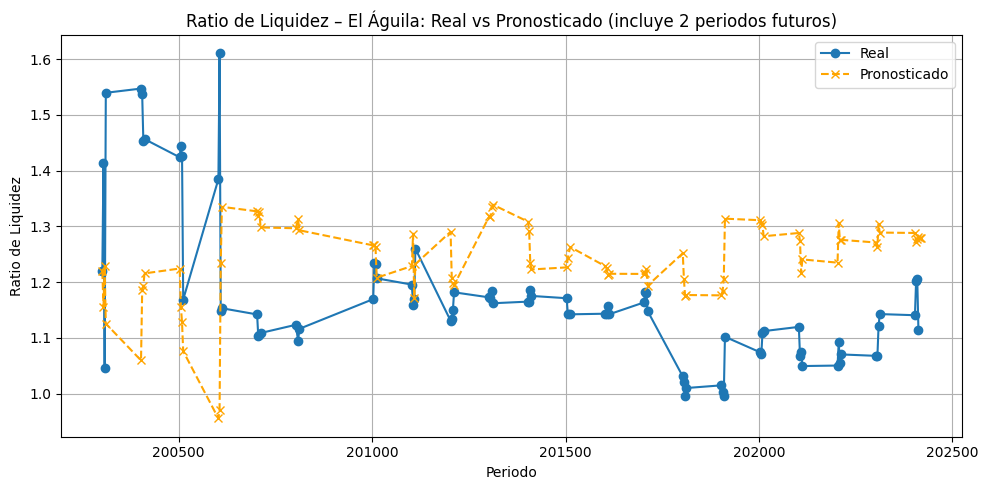


Archivo exportado como 'Pronostico_El_Aguila.xlsx'


In [ ]:
# Instalación de librerías necesarias
!pip install linearmodels pandas openpyxl --quiet

import pandas as pd
import numpy as np
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ----------------------------
# 1. Ajustar modelo con PANEL BIEN
# ----------------------------

# Cargar y limpiar la base PANEL BIEN
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df = df[df['PERIODO'] != 'PERIODO']
df['PERIODO'] = pd.to_numeric(df['PERIODO'])
df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

# Preparar datos de panel
df_panel = df.set_index(['UNIONES', 'PERIODO'])
Y = df_panel['RATIO_LIQUIDEZ']
X = sm.add_constant(df_panel[['IMOR', 'ICOR', 'ROE', 'ROA']])
modelo = PanelOLS(Y, X, entity_effects=True)
resultados = modelo.fit()

# Obtener coeficientes
coeficientes = resultados.params
print("Coeficientes del modelo:")
print(coeficientes)

print("\nResultados del summary:")
print(resultados.summary)

# ----------------------------
# 2. Función forecast
# ----------------------------

def forecast_panel(X_nuevo, coeficientes):
    """
    Realiza el pronóstico de RATIO_LIQUIDEZ utilizando los coeficientes del modelo.
    """
    return X_nuevo.dot(coeficientes)

# ----------------------------
# 3. Pronóstico de El Águila
# ----------------------------

# Leer archivo de El Águila
df_aguila = pd.read_excel("El Águila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

# Preparar X con constante y pronosticar
X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']], has_constant='add')
df_aguila['PRONOSTICO'] = forecast_panel(X_aguila, coeficientes)
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

# Calcular métricas de error
rmse_aguila = np.sqrt((df_aguila['ERROR'] ** 2).mean())
mae_aguila = np.mean(np.abs(df_aguila['ERROR']))

print(f"\nRMSE del pronóstico de El Águila (sin efecto fijo): {rmse_aguila:.4f}")
print(f"MAE (Error Promedio Absoluto): {mae_aguila:.4f}")

print("\nComparación real vs. pronóstico:")
print(df_aguila[['PERIODO', 'RATIO_LIQUIDEZ', 'PRONOSTICO', 'ERROR']])

# ----------------------------
# 3B. Agregar dos periodos futuros a El Águila
# ----------------------------

# Definir los nuevos periodos a pronosticar (trimestral)
ult_periodo = df_aguila['PERIODO'].max()
nuevos_periodos = [ult_periodo + 3, ult_periodo + 6]

# Estimar tendencia para cada variable independiente
variables = ['IMOR', 'ICOR', 'ROE', 'ROA']
tendencias = {}
for var in variables:
    pendiente, inter = np.polyfit(df_aguila['PERIODO'], df_aguila[var], 1)
    tendencias[var] = (pendiente, inter)

# Crear nuevo DataFrame para los periodos futuros
futuro_data = []
for p in nuevos_periodos:
    nueva_obs = {'UNIONES': 'EL ÁGUILA', 'PERIODO': p}
    for var in variables:
        pendiente, inter = tendencias[var]
        nueva_obs[var] = pendiente * p + inter
    futuro_data.append(nueva_obs)

df_futuro = pd.DataFrame(futuro_data)
X_futuro = sm.add_constant(df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA']], has_constant='add')
df_futuro['RATIO_LIQUIDEZ'] = np.nan
df_futuro['PRONOSTICO'] = forecast_panel(X_futuro, coeficientes)
df_futuro['ERROR'] = np.nan

# Unir todo
df_aguila_extendido = pd.concat([df_aguila, df_futuro], ignore_index=True).sort_values(by='PERIODO')

# ----------------------------
# 4. Graficar resultado
# ----------------------------

plt.figure(figsize=(10, 5))
plt.plot(df_aguila_extendido['PERIODO'], df_aguila_extendido['RATIO_LIQUIDEZ'], marker='o', label='Real')
plt.plot(df_aguila_extendido['PERIODO'], df_aguila_extendido['PRONOSTICO'], marker='x', linestyle='--', color='orange', label='Pronosticado')
plt.title('Ratio de Liquidez – El Águila: Real vs Pronosticado (incluye 2 periodos futuros)')
plt.xlabel('Periodo')
plt.ylabel('Ratio de Liquidez')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 5. Exportar a Excel
# ----------------------------

df_aguila_extendido.to_excel("Pronostico_El_Aguila.xlsx", index=False)
print("\nArchivo exportado como 'Pronostico_El_Aguila.xlsx'")


Coeficientes del modelo:
const    1.385403
IMOR    -0.002821
ICOR    -0.001994
ROE     -0.002660
ROA      0.017689
Name: parameter, dtype: float64
Resultados del summary: 
                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Thu, May 29 2025   R-squared (Overall):              0.1086
Time:                        08:11:34   Log-likelihood                   -118.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:          

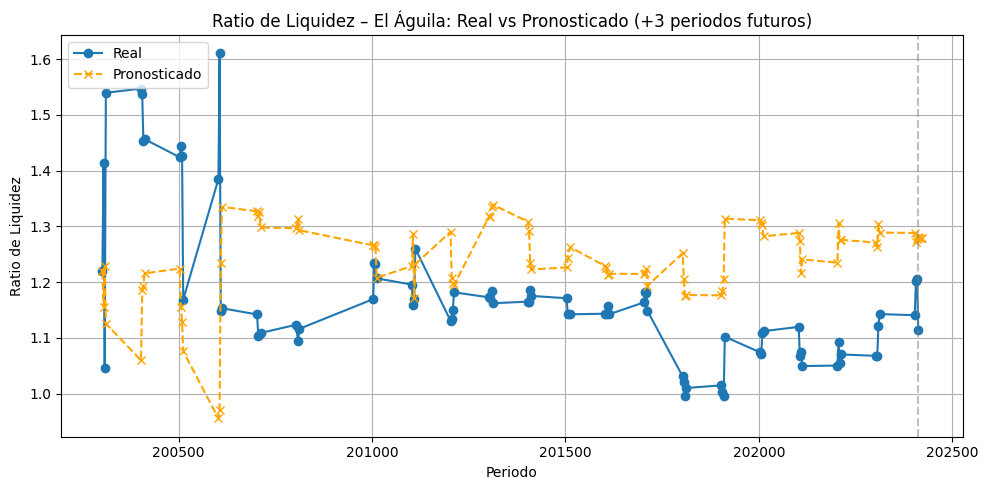


Archivo exportado como 'Pronostico_El_Aguila.xlsx'


In [ ]:
# Instalación de librerías necesarias
!pip install linearmodels
!pip install pandas openpyxl

import pandas as pd
import numpy as np
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ----------------------------
# 1. Ajustar modelo con PANEL BIEN
# ----------------------------

# Cargar y limpiar la base PANEL BIEN
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df = df[df['PERIODO'] != 'PERIODO']
df['PERIODO'] = pd.to_numeric(df['PERIODO'])
df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

# Preparar datos de panel
df_panel = df.set_index(['UNIONES', 'PERIODO'])
Y = df_panel['RATIO_LIQUIDEZ']
X = sm.add_constant(df_panel[['IMOR', 'ICOR', 'ROE', 'ROA']])
modelo = PanelOLS(Y, X, entity_effects=True)
resultados = modelo.fit()

# Obtener coeficientes
coeficientes = resultados.params
print("Coeficientes del modelo:")
print(coeficientes)

print("Resultados del summary: ")
print(resultados.summary)

# ----------------------------
# 2. Función forecast
# ----------------------------

def forecast_panel(X_nuevo, coeficientes):
    """
    Realiza el pronóstico de RATIO_LIQUIDEZ utilizando los coeficientes del modelo.
    """
    return X_nuevo.dot(coeficientes)

# ----------------------------
# 3. Pronóstico de El Águila
# ----------------------------

# Leer archivo de El Águila
df_aguila = pd.read_excel("El Águila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

# Preparar X con constante
X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])

# Usar la función forecast
df_aguila['PRONOSTICO'] = forecast_panel(X_aguila, coeficientes)

# Calcular error
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

# Calcular métricas de error
rmse_aguila = np.sqrt((df_aguila['ERROR'] ** 2).mean())
mae_aguila = np.mean(np.abs(df_aguila['ERROR']))

print(f"\nRMSE del pronóstico de El Águila (sin efecto fijo): {rmse_aguila:.4f}")
print(f"MAE (Error Promedio Absoluto): {mae_aguila:.4f}")

# Mostrar tabla de comparación
print("\nComparación real vs. pronóstico:")
print(df_aguila[['PERIODO', 'RATIO_LIQUIDEZ', 'PRONOSTICO', 'ERROR']])

# ----------------------------
# 🔹 AGREGAR 3 PERIODOS MÁS SOLO USANDO LA TENDENCIA
# ----------------------------

# Calcular tendencia para cada variable independiente
variables = ['IMOR', 'ICOR', 'ROE', 'ROA']
tendencias = {}
for var in variables:
    pendiente, inter = np.polyfit(df_aguila['PERIODO'], df_aguila[var], 1)
    tendencias[var] = (pendiente, inter)

# Crear 3 nuevos periodos
ultimo_periodo = df_aguila['PERIODO'].max()
nuevos_periodos = [ultimo_periodo + 3, ultimo_periodo + 6, ultimo_periodo + 9]
nuevos_datos = []

for p in nuevos_periodos:
    fila = {'UNIONES': 'EL ÁGUILA', 'PERIODO': p}
    for var in variables:
        pendiente, inter = tendencias[var]
        fila[var] = pendiente * p + inter
    fila['RATIO_LIQUIDEZ'] = np.nan  # aún no se conoce
    nuevos_datos.append(fila)

df_futuro = pd.DataFrame(nuevos_datos)
X_futuro = sm.add_constant(df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_futuro['PRONOSTICO'] = forecast_panel(X_futuro, coeficientes)
df_futuro['ERROR'] = np.nan

# Combinar datos reales + pronóstico futuro
df_aguila_extendido = pd.concat([df_aguila, df_futuro], ignore_index=True).sort_values('PERIODO')

# ----------------------------
# 4. Graficar resultado
# ----------------------------

plt.figure(figsize=(10, 5))
plt.plot(df_aguila_extendido['PERIODO'], df_aguila_extendido['RATIO_LIQUIDEZ'], marker='o', label='Real')
plt.plot(df_aguila_extendido['PERIODO'], df_aguila_extendido['PRONOSTICO'], marker='x', linestyle='--', color='orange', label='Pronosticado')
plt.axvline(x=ultimo_periodo, color='gray', linestyle='--', alpha=0.5)
plt.title('Ratio de Liquidez – El Águila: Real vs Pronosticado (+3 periodos futuros)')
plt.xlabel('Periodo')
plt.ylabel('Ratio de Liquidez')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 5. Exportar a Excel
# ----------------------------

df_aguila_extendido.to_excel("Pronostico_El_Aguila.xlsx", index=False)
print("\nArchivo exportado como 'Pronostico_El_Aguila.xlsx'")


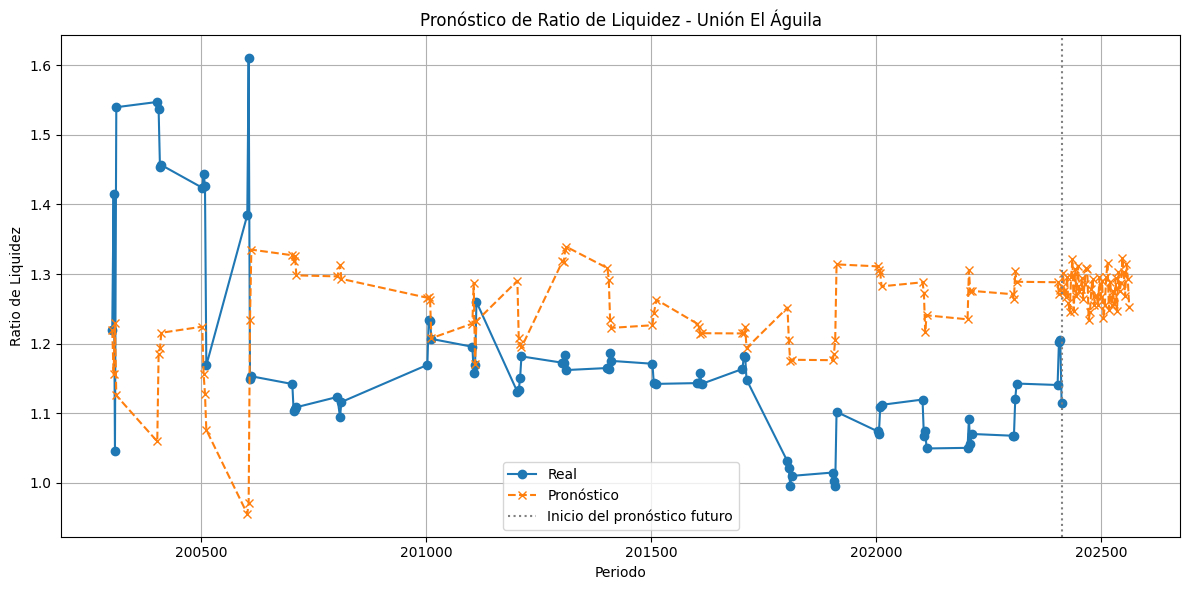

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

# ----------------------------
# 1. Cargar y ajustar modelo panel
# ----------------------------
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df = df[df['PERIODO'] != 'PERIODO']
df['PERIODO'] = pd.to_numeric(df['PERIODO'])
df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

df_panel = df.set_index(['UNIONES', 'PERIODO'])
Y = df_panel['RATIO_LIQUIDEZ']
X = sm.add_constant(df_panel[['IMOR', 'ICOR', 'ROE', 'ROA']])
modelo = PanelOLS(Y, X, entity_effects=True)
resultados = modelo.fit()
coeficientes = resultados.params

# ----------------------------
# 2. Leer archivo de El Águila y pronosticar valores actuales
# ----------------------------
df_aguila = pd.read_excel("El Águila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_aguila['PRONOSTICO'] = X_aguila.dot(coeficientes)
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

# ----------------------------
# 3. Generar 50 periodos adicionales con más realismo
# ----------------------------
variables = ['IMOR', 'ICOR', 'ROE', 'ROA']
tendencias = {}

for var in variables:
    pendiente, inter = np.polyfit(df_aguila['PERIODO'], df_aguila[var], 1)
    tendencias[var] = (pendiente, inter)

ultimo_periodo = df_aguila['PERIODO'].max()
nuevos_periodos = [ultimo_periodo + i for i in range(3, 3 * 51, 3)]

np.random.seed(42)
nuevos_datos = []

for i, p in enumerate(nuevos_periodos):
    fila = {'UNIONES': 'EL ÁGUILA', 'PERIODO': p}

    for var in variables:
        pendiente, inter = tendencias[var]
        base_lineal = pendiente * p + inter
        efecto_log = 0.015 * np.log(p - ultimo_periodo + 1)
        estacionalidad = 0.02 * np.sin(i / 3 * np.pi)
        std_hist = df_aguila[var].std()
        ruido = np.random.normal(0, 0.15 * std_hist)

        fila[var] = base_lineal * (1 + efecto_log + estacionalidad) + ruido

    fila['RATIO_LIQUIDEZ'] = np.nan
    nuevos_datos.append(fila)

df_futuro = pd.DataFrame(nuevos_datos)
X_futuro = sm.add_constant(df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_futuro['PRONOSTICO'] = X_futuro.dot(coeficientes)
df_futuro['ERROR'] = np.nan

# ----------------------------
# 4. Unir y exportar resultados
# ----------------------------
df_aguila_extendido = pd.concat([df_aguila, df_futuro], ignore_index=True).sort_values('PERIODO')

# Exportar a Excel
df_aguila_extendido.to_excel("Pronostico_El_Aguila.xlsx", index=False)

# ----------------------------
# 5. Graficar
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(df_aguila_extendido['PERIODO'], df_aguila_extendido['RATIO_LIQUIDEZ'], label='Real', marker='o')
plt.plot(df_aguila_extendido['PERIODO'], df_aguila_extendido['PRONOSTICO'], label='Pronóstico', linestyle='--', marker='x')
plt.axvline(ultimo_periodo, color='gray', linestyle=':', label='Inicio del pronóstico futuro')
plt.xlabel('Periodo')
plt.ylabel('Ratio de Liquidez')
plt.title('Pronóstico de Ratio de Liquidez - Unión El Águila')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



=== RESUMEN DEL MODELO ===

                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Wed, Jun 04 2025   R-squared (Overall):              0.1086
Time:                        06:40:56   Log-likelihood                   -118.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:                       82.000                                           
Max Obs:                       82.000   F-statistic (robust):             23.110

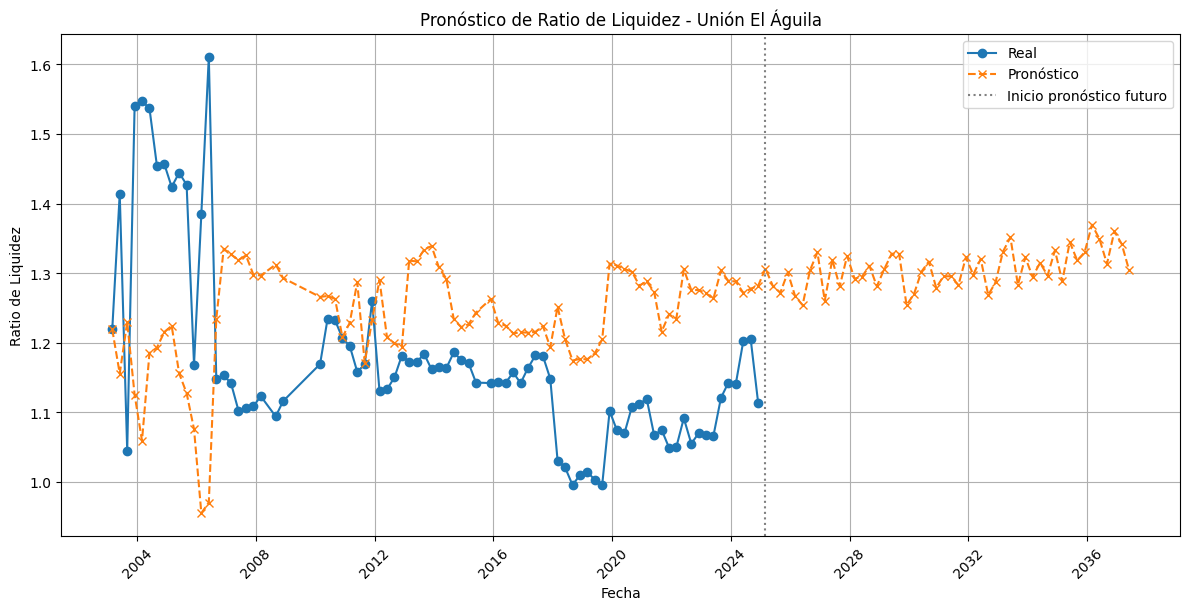


=== ERRORES DEL PRONÓSTICO (datos reales de El Águila) ===
MAE  (Error Absoluto Medio): 0.1615
MSE  (Error Cuadrático Medio): 0.0379
RMSE (Raíz del Error Cuadrático Medio): 0.1948


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
from datetime import datetime
import matplotlib.dates as mdates

# ----------------------------
# 1. Cargar y ajustar modelo panel
# ----------------------------
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df = df[df['PERIODO'] != 'PERIODO']
df['PERIODO'] = pd.to_numeric(df['PERIODO'])
df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

df_panel = df.set_index(['UNIONES', 'PERIODO'])
Y = df_panel['RATIO_LIQUIDEZ']
X = sm.add_constant(df_panel[['IMOR', 'ICOR', 'ROE', 'ROA']])
modelo = PanelOLS(Y, X, entity_effects=True)
resultados = modelo.fit()
coeficientes = resultados.params

print("\n=== RESUMEN DEL MODELO ===\n")
print(resultados.summary)

# ----------------------------
# 2. Leer archivo de El Águila y pronosticar valores actuales
# ----------------------------
df_aguila = pd.read_excel("El Águila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_aguila['PRONOSTICO'] = X_aguila.dot(coeficientes)
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

# ----------------------------
# 3. Generar 50 periodos adicionales con más realismo
# ----------------------------
variables = ['IMOR', 'ICOR', 'ROE', 'ROA']
tendencias = {}
for var in variables:
    pendiente, inter = np.polyfit(df_aguila['PERIODO'], df_aguila[var], 1)
    tendencias[var] = (pendiente, inter)

# Traducir PERIODO a fechas trimestrales
def periodo_to_fecha(periodo):
    año = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    return pd.Timestamp(f"{año}-{mes:02d}-01")

def avanzar_trimestre(periodo):
    año = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    mes += 3
    if mes > 12:
        mes -= 12
        año += 1
    return año * 100 + mes

ultimo_periodo = int(df_aguila['PERIODO'].max())
nuevos_periodos = [avanzar_trimestre(ultimo_periodo)]
for _ in range(49):
    nuevos_periodos.append(avanzar_trimestre(nuevos_periodos[-1]))

np.random.seed(42)
nuevos_datos = []

for i, p in enumerate(nuevos_periodos):
    fila = {'UNIONES': 'EL ÁGUILA', 'PERIODO': p}

    for var in variables:
        pendiente, inter = tendencias[var]
        base_lineal = pendiente * p + inter
        efecto_log = 0.015 * np.log(i + 1)
        estacionalidad = 0.02 * np.sin(i / 3 * np.pi)
        std_hist = df_aguila[var].std()
        ruido = np.random.normal(0, 0.15 * std_hist)
        fila[var] = base_lineal * (1 + efecto_log + estacionalidad) + ruido

    fila['RATIO_LIQUIDEZ'] = np.nan
    nuevos_datos.append(fila)

df_futuro = pd.DataFrame(nuevos_datos)
X_futuro = sm.add_constant(df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_futuro['PRONOSTICO'] = X_futuro.dot(coeficientes)
df_futuro['ERROR'] = np.nan

# ----------------------------
# 4. Unir, convertir a fechas y exportar resultados
# ----------------------------
df_aguila_extendido = pd.concat([df_aguila, df_futuro], ignore_index=True).sort_values('PERIODO')
df_aguila_extendido['PERIODO_FECHA'] = df_aguila_extendido['PERIODO'].apply(periodo_to_fecha)

# Exportar a Excel
df_aguila_extendido.to_excel("Pronostico_El_Aguila.xlsx", index=False)

# ----------------------------
# 5. Graficar con fechas reales
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['RATIO_LIQUIDEZ'], label='Real', marker='o')
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['PRONOSTICO'], label='Pronóstico', linestyle='--', marker='x')
fecha_inicio_futuro = periodo_to_fecha(avanzar_trimestre(ultimo_periodo))
plt.axvline(fecha_inicio_futuro, color='gray', linestyle=':', label='Inicio pronóstico futuro')
plt.xlabel('Fecha')
plt.ylabel('Ratio de Liquidez')
plt.title('Pronóstico de Ratio de Liquidez - Unión El Águila')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# ----------------------------
# 6. Evaluación del modelo
# ----------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error

real = df_aguila['RATIO_LIQUIDEZ']
pred = df_aguila['PRONOSTICO']
mse = mean_squared_error(real, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real, pred)

print("\n=== ERRORES DEL PRONÓSTICO (datos reales de El Águila) ===")
print(f"MAE  (Error Absoluto Medio): {mae:.4f}")
print(f"MSE  (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
